# Removing losses from rainfall profiles
The rainfall input which is required by the Hec-Ras model is the net rainfall, after losses have been subtracted (this is something to do with Hec-Ras not being able to model losses to infiltration etc). To get this net rainfall the synthetic rainfall profiles are input into ReFH2, antecedent conditions are provided, and a .csv file which includes the rainfall with losses removed is output.

This script plots the rainfall both pre and post loss removal for the two methods of generating synthetic rainfall events. 

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import matplotlib.patches as mpatches
import numpy as np
from datetime import datetime, timedelta

roberto_profiles_fp = "RobertoProfiles/"
multiple_peaks_fp =  "MultiplePeaks/"

## Multiple peaks

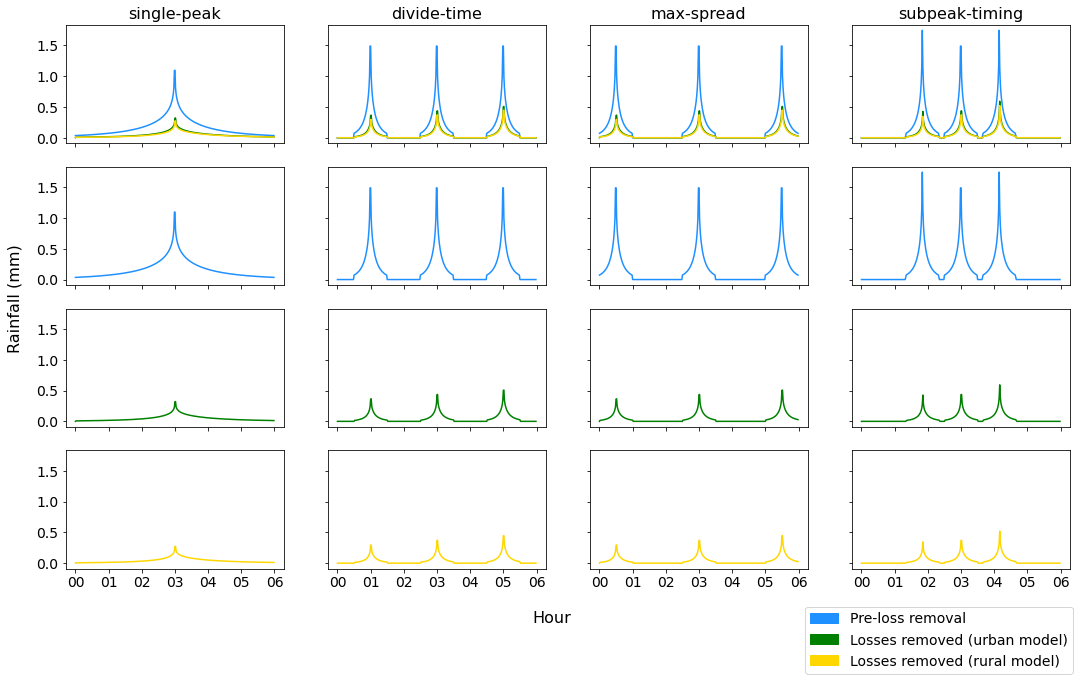

In [2]:
methods=['single-peak','divide-time','max-spread','subpeak-timing']
durations = ['1h', '3h', '6h']

# Set size of x/y tick labels in all subplots
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

# Create figure
fig, axes = plt.subplots(4, len(methods), figsize=(18,10), sharex =True, sharey = True)

# Set title on columns
for ax, col in zip(axes[0], methods):
    ax.set_title(col, size =16)
    
# Read in data
for axes_number, method in enumerate(methods):
    
    pre_loss_removal = pd.read_csv(multiple_peaks_fp + "PreLossRemoval/6h/6h_{}.csv".format(method))
    pre_loss_removal = pre_loss_removal.rename(columns={'2022-04-05 00:00:00': 'Time', '0.0': 'Rainfall'})
    post_loss_removal_urban = pd.read_csv(multiple_peaks_fp + "PostLossRemoval/6h/6h_{}_urban.csv".format(method))
    post_loss_removal_rural = pd.read_csv(multiple_peaks_fp + "PostLossRemoval/6h/6h_{}_rural.csv".format(method))
    
    # Convert date to datetime
    pre_loss_removal['Time'] = pd.to_datetime(pre_loss_removal['Time'])
    post_loss_removal_urban['Time'] = pd.to_datetime(post_loss_removal_urban['Time'])
    post_loss_removal_rural['Time'] = pd.to_datetime(post_loss_removal_rural['Time'])
    
    # Filter to only include those within the first 6 hours
    post_loss_removal_urban = post_loss_removal_urban[(post_loss_removal_urban['Time'] >= '2022-05-04 00:00:00') & (post_loss_removal_urban['Time'] < '2022-05-04 06:00:00')]
    post_loss_removal_rural = post_loss_removal_rural[(post_loss_removal_rural['Time'] >= '2022-05-04 00:00:00') & (post_loss_removal_rural['Time'] < '2022-05-04 06:00:00')]
    
    # Dates are flipped between the two, dates are arbitrary anyway, so just make consistent
    pre_loss_removal['Time'] =  post_loss_removal_rural['Time']
    
    # PLot
    axes[0, axes_number].plot(pre_loss_removal['Time'], pre_loss_removal['Rainfall'], color = 'dodgerblue')
    axes[0, axes_number].plot(post_loss_removal_urban['Time'], post_loss_removal_urban['Total net rain mm (Observed rainfall - 05/04/2022) - urbanised model'], color = 'green')
    axes[0, axes_number].plot(post_loss_removal_rural['Time'], post_loss_removal_rural['Total net rain mm (Observed rainfall - 05/04/2022) - as 100% rural model'], color = 'gold')

    axes[1, axes_number].plot(pre_loss_removal['Time'], pre_loss_removal['Rainfall'], color = 'dodgerblue')
    axes[2, axes_number].plot(post_loss_removal_urban['Time'], post_loss_removal_urban['Total net rain mm (Observed rainfall - 05/04/2022) - urbanised model'], color = 'green')
    axes[3, axes_number].plot(post_loss_removal_rural['Time'], post_loss_removal_rural['Total net rain mm (Observed rainfall - 05/04/2022) - as 100% rural model'], color = 'gold')
   
    myFmt = mdates.DateFormatter('%H')
    axes[3, axes_number].xaxis.set_major_formatter(myFmt)
    
fig.text(0.5, 0.05, 'Hour', ha='center', size =16)
fig.text(0.08, 0.5, 'Rainfall (mm)', va='center', rotation='vertical', size = 16)    

green_patch = mpatches.Patch(color='green', label='Losses removed (urban model)')
blue_patch = mpatches.Patch(color='dodgerblue', label='Pre-loss removal')
gold_patch = mpatches.Patch(color='gold', label='Losses removed (rural model)')
plt.legend(handles=[blue_patch, green_patch, gold_patch], loc="lower center", fontsize= 14, bbox_to_anchor=(0.4, -0.95))

## Roberto profiles 

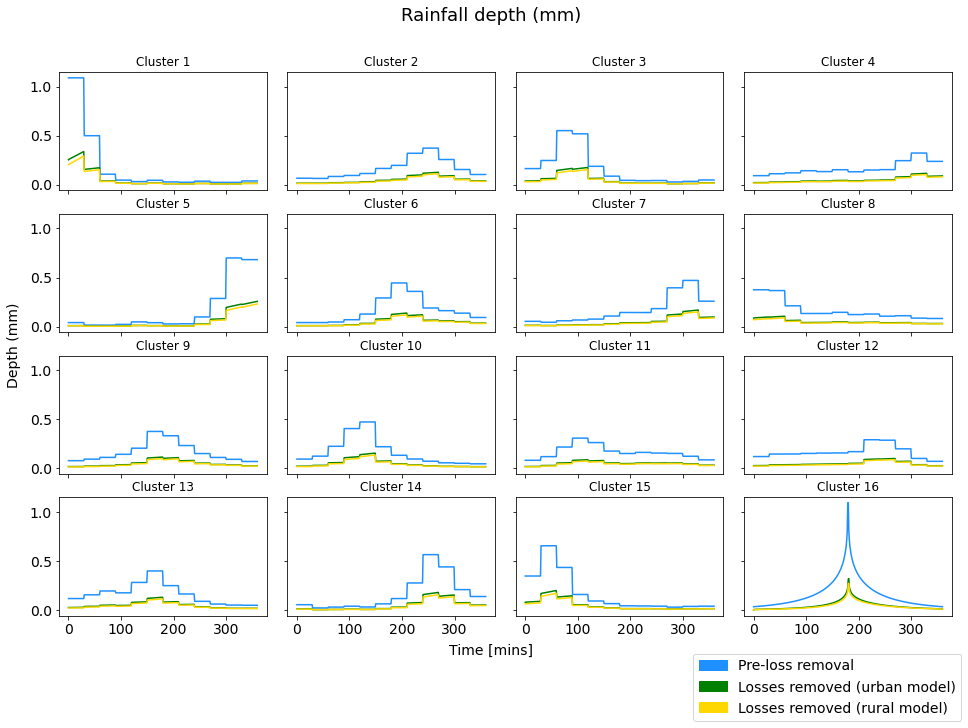

In [4]:
total_duration_minutes = 60* 6 
# Define cluster numbers (one extra for FEH single peak plot)
clusters =[*range(1, 17, 1)]

# Plot
fig, axs = plt.subplots(nrows=4, ncols=4, figsize =(16,10), sharey=True, sharex = True)
plt.subplots_adjust(wspace=0.1)
fig.suptitle("Rainfall depth (mm)", fontsize=18, y=0.97)
      
# loop through tickers and axes
for axes_number, cluster_num in enumerate(clusters):
    if cluster_num == 16:
            pre_loss_removal = pd.read_csv(multiple_peaks_fp + "PreLossRemoval/6h/6h_{}.csv".format('single-peak'))
            pre_loss_removal = pre_loss_removal.rename(columns={'2022-04-05 00:00:00': 'Time', '0.0': 'Rainfall'})
            post_loss_removal_urban = pd.read_csv(multiple_peaks_fp + "PostLossRemoval/6h/6h_{}_urban.csv".format('single-peak'))
            post_loss_removal_rural = pd.read_csv(multiple_peaks_fp + "PostLossRemoval/6h/6h_{}_rural.csv".format('single-peak'))
    else:
        pre_loss_removal = pd.read_csv(roberto_profiles_fp + "PreLossRemoval/6hr_100yrRP/cluster{}.csv".format(cluster_num), names = ['Time', 'Rainfall'])
        post_loss_removal_urban = pd.read_csv(roberto_profiles_fp + "PostLossRemoval/6hr_100yrRP/cluster{}_urban.csv".format(cluster_num))
        post_loss_removal_rural = pd.read_csv(roberto_profiles_fp + "PostLossRemoval/6hr_100yrRP/cluster{}_rural.csv".format(cluster_num))

    ax = axs.ravel()[cluster_num-1]
    
    # Convert date to datetime
    pre_loss_removal['Time'] = pd.to_datetime(pre_loss_removal['Time'])
    post_loss_removal_urban['Time'] = pd.to_datetime(post_loss_removal_urban['Time'])
    post_loss_removal_rural['Time'] = pd.to_datetime(post_loss_removal_rural['Time'])

    # Filter to only include those within the first 6 hours
    start_time = post_loss_removal_urban['Time'].loc[0]
    end_time = start_time + timedelta(hours=6) - timedelta(minutes=1)
    post_loss_removal_urban = post_loss_removal_urban[(post_loss_removal_urban['Time'] >= start_time) & (post_loss_removal_urban['Time'] <= end_time)]
    post_loss_removal_rural = post_loss_removal_rural[(post_loss_removal_rural['Time'] >= start_time) & (post_loss_removal_rural['Time'] <= end_time)]

    # Dates are flipped between the two, dates are arbitrary anyway, so just make consistent
    pre_loss_removal['Time'] =  np.array(range(total_duration_minutes))
    post_loss_removal_urban['Time'] =  np.array(range(total_duration_minutes))    
    post_loss_removal_rural['Time'] =  np.array(range(total_duration_minutes)) 
    
    ax.plot(pre_loss_removal['Time'], pre_loss_removal['Rainfall'], color = 'dodgerblue')
    ax.plot(post_loss_removal_urban['Time'], post_loss_removal_urban[post_loss_removal_urban.columns[5]], color = 'green')
    ax.plot(post_loss_removal_rural['Time'], post_loss_removal_rural[post_loss_removal_rural.columns[5]], color = 'gold')
    
    # Add plot subtitles
    if cluster_num == 0:
        ax.set_title("FEH profile")
    else:
        ax.set_title("Cluster {}".format(cluster_num))
        
fig.text(0.5, 0.07, 'Time [mins]', ha='center', fontsize =14)
fig.text(0.08, 0.5, "Depth (mm)", va='center', rotation='vertical', fontsize =14)

# Legend
green_patch = mpatches.Patch(color='green', label='Losses removed (urban model)')
blue_patch = mpatches.Patch(color='dodgerblue', label='Pre-loss removal')
gold_patch = mpatches.Patch(color='gold', label='Losses removed (rural model)')
plt.legend(handles=[blue_patch, green_patch, gold_patch], loc="lower center", fontsize= 14, bbox_to_anchor=(0.4, -0.95))

FileNotFoundError: [Errno 2] No such file or directory: 'RobertoProfiles/PostLossRemoval/6hr_100yrRP/cluster1_urban.csv'

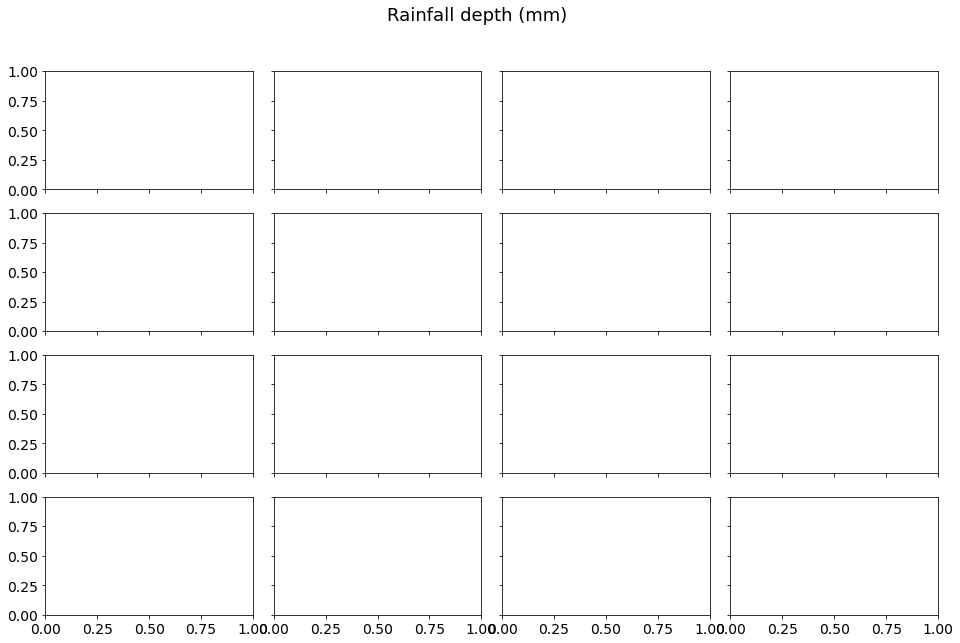

In [3]:
total_duration_minutes = 60* 6 
# Define cluster numbers (one extra for FEH single peak plot)
clusters =[*range(1, 17, 1)]

# Plot
fig, axs = plt.subplots(nrows=4, ncols=4, figsize =(16,10), sharey=True, sharex = True)
plt.subplots_adjust(wspace=0.1)
fig.suptitle("Rainfall depth (mm)", fontsize=18, y=0.97)
      
# loop through tickers and axes
for axes_number, cluster_num in enumerate(clusters):
    if cluster_num == 16:
            pre_loss_removal = pd.read_csv(multiple_peaks_fp + "PreLossRemoval/6h/6h_{}.csv".format('single-peak'))
            pre_loss_removal = pre_loss_removal.rename(columns={'2022-04-05 00:00:00': 'Time', '0.0': 'Rainfall'})
            post_loss_removal_urban = pd.read_csv(multiple_peaks_fp + "PostLossRemoval/6h/6h_{}_urban.csv".format('single-peak'))
            post_loss_removal_rural = pd.read_csv(multiple_peaks_fp + "PostLossRemoval/6h/6h_{}_rural.csv".format('single-peak'))
    else:
        pre_loss_removal = pd.read_csv(roberto_profiles_fp + "PreLossRemoval/6hr_100yrRP/cluster{}.csv".format(cluster_num), names = ['Time', 'Rainfall'])
        post_loss_removal_urban = pd.read_csv(roberto_profiles_fp + "PostLossRemoval/6hr_100yrRP/cluster{}_urban.csv".format(cluster_num))
        post_loss_removal_rural = pd.read_csv(roberto_profiles_fp + "PostLossRemoval/6hr_100yrRP/cluster{}_rural.csv".format(cluster_num))

    ax = axs.ravel()[cluster_num-1]
    
    # Convert date to datetime
    pre_loss_removal['Time'] = pd.to_datetime(pre_loss_removal['Time'])
    post_loss_removal_urban['Time'] = pd.to_datetime(post_loss_removal_urban['Time'])
    post_loss_removal_rural['Time'] = pd.to_datetime(post_loss_removal_rural['Time'])

    # Filter to only include those within the first 6 hours
    start_time = post_loss_removal_urban['Time'].loc[0]
    end_time = start_time + timedelta(hours=6) - timedelta(minutes=1)
    post_loss_removal_urban = post_loss_removal_urban[(post_loss_removal_urban['Time'] >= start_time) & (post_loss_removal_urban['Time'] <= end_time)]
    post_loss_removal_rural = post_loss_removal_rural[(post_loss_removal_rural['Time'] >= start_time) & (post_loss_removal_rural['Time'] <= end_time)]

    # Dates are flipped between the two, dates are arbitrary anyway, so just make consistent
    pre_loss_removal['Time'] =  np.array(range(total_duration_minutes))
    post_loss_removal_urban['Time'] =  np.array(range(total_duration_minutes))    
    post_loss_removal_rural['Time'] =  np.array(range(total_duration_minutes)) 
    
    ax.plot(pre_loss_removal['Time'], pre_loss_removal['Rainfall'], color = 'dodgerblue')
    ax.plot(post_loss_removal_urban['Time'], post_loss_removal_urban[post_loss_removal_urban.columns[5]], color = 'green')
    ax.plot(post_loss_removal_rural['Time'], post_loss_removal_rural[post_loss_removal_rural.columns[5]], color = 'gold')
    
    # Add plot subtitles
    if cluster_num == 0:
        ax.set_title("FEH profile")
    else:
        ax.set_title("Cluster {}".format(cluster_num))
        
fig.text(0.5, 0.07, 'Time [mins]', ha='center', fontsize =14)
fig.text(0.08, 0.5, "Depth (mm)", va='center', rotation='vertical', fontsize =14)

# Legend
green_patch = mpatches.Patch(color='green', label='Losses removed (urban model)')
blue_patch = mpatches.Patch(color='dodgerblue', label='Pre-loss removal')
gold_patch = mpatches.Patch(color='gold', label='Losses removed (rural model)')
plt.legend(handles=[blue_patch, green_patch, gold_patch], loc="lower center", fontsize= 14, bbox_to_anchor=(0.4, -0.95))

# Find difference between pre- and post- loss removal in max rainfall rate

In [145]:
max_rain_rate_reductions = pd.DataFrame(None)
# Loop thru clusters
for cluster_num in range(1,16):
    # Read in pre and post loss removal data
    pre_loss_removal = pd.read_csv("RobertoProfiles/PreLossRemoval/6hr_100yrRP/cluster{}.csv".format(cluster_num), names = ['Time', 'Rainfall'])
    post_loss_removal_urban = pd.read_csv("RobertoProfiles/PostLossRemoval/6hr_100yrRP/cluster{}_urban.csv".format(cluster_num))
    # Find differnce between max rain rate before loss removal and max rate after
    diff = pre_loss_removal['Rainfall'].max() - post_loss_removal_urban['Total net rain mm (Observed rainfall - 01/01/2022) - urbanised model'].max()
    # Find the difference between the timing of max rain rate in this cluster and for the single-peaked profile
    minute_of_max_rain_rate = pre_loss_removal['Rainfall'].idxmax()
    # Create row and add to dataframe
    row = pd.DataFrame({'Cluster': cluster_num, 'Difference':round(diff/pre_loss_removal['Rainfall'].max() * 100,1),
                       'Minute of max rain rate': minute_of_max_rain_rate}, index = [cluster_num])
    max_rain_rate_reductions = max_rain_rate_reductions.append(row)
# Sort
max_rain_rate_reductions = max_rain_rate_reductions.sort_values(by=['Difference'])

## Plot the relationship between the difference in pre and post max rainfall rate and the timing of this maximum rainfall rate

This shows that the earlier in the event that the maximum rainfall rate occurs, the greater the reduction in the maximum rainfall rate

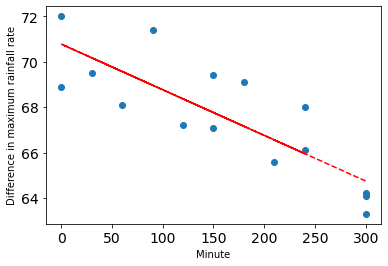

In [147]:
plt.scatter(max_rain_rate_reductions['Minute of max rain rate'], max_rain_rate_reductions['Difference'])
plt.xlabel('Minute')
plt.ylabel('Difference in maximum rainfall rate')

z = np.polyfit(max_rain_rate_reductions['Minute of max rain rate'],max_rain_rate_reductions['Difference'], 1)
p = np.poly1d(z)
plt.plot(max_rain_rate_reductions['Minute of max rain rate'],p(max_rain_rate_reductions['Minute of max rain rate']),"r--")

plt.show()

In [11]:
max_rain_rate_reductions = pd.DataFrame(None)
# Loop thru clusters
for cluster_num in range(1,16):
    # Read in pre and post loss removal data
    pre_loss_removal = pd.read_csv("RobertoProfiles/PreLossRemoval/6hr_100yrRP/cluster{}.csv".format(cluster_num), names = ['Time', 'Rainfall'])
    post_loss_removal_urban = pd.read_csv("RobertoProfiles/PostLossRemoval/6hr_100yrRP/cluster{}_urban.csv".format(cluster_num))
    
    print(post_loss_removal_urban['Total net rain mm (Observed rainfall - 01/01/2022) - urbanised model'].sum())

18.316355114725155
18.316364344
18.316364323610514
18.316364310891878
18.316364295861824
18.316364341145405
18.316364331296267
18.316363349721716
18.31636430757881
18.31636429604823
18.316364337458978
18.316364293162472
18.316364299001755
18.31636434921616
18.31636341720857


In [ ]:
max_rain_rate_reductions = pd.DataFrame(None)
# Loop thru clusters
for cluster_num in range(1,16):
    # Read in pre and post loss removal data
    pre_loss_removal = pd.read_csv("RobertoProfiles/PreLossRemoval/6hr_100yrRP/cluster{}.csv".format(cluster_num), names = ['Time', 'Rainfall'])
    post_loss_removal_urban = pd.read_csv("RobertoProfiles/PostLossRemoval/6hr_100yrRP/cluster{}_urban.csv".format(cluster_num))
    # Find differnce between max rain rate before loss removal and max rate after